In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.legend_handler import HandlerTuple
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [2]:
# create color patterns
import colors

orange = ["#ffac00"]
darkorange = ["#c46e00"]
blue = ["#0F52BA"]
gold = ["#FFA000"]
green = ["#61a842"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
brown = ["#98733a"]
purple = ["#cb5fb1"]
qt_red = ["#B22222"]
c0_blue = ["#1f77b4"]
c1_orange = ["#ff7f0e"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        gold.append(colors.get_alpha_hex(gold[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))
        brown.append(colors.get_alpha_hex(brown[0],beta[i]))
        purple.append(colors.get_alpha_hex(purple[0],beta[i]))
        qt_red.append(colors.get_alpha_hex(qt_red[0],beta[i]))
        c0_blue.append(colors.get_alpha_hex(c0_blue[0],beta[i]))
        c1_orange.append(colors.get_alpha_hex(c1_orange[0],beta[i]))

In [3]:
### QT and ME data (from QuTip)
data_me_run_free_w_state = np.load("../data/me_run_free_nqubit10_w_state.npz")
data_me_run_x2_w_state = np.load("../data/me_run_x2_nqubit10_w_state.npz")
data_me_run_free_plus_state = np.load("../data/me_run_free_nqubit10_plus_state.npz")
data_me_run_x2_plus_state = np.load("../data/me_run_x2_nqubit10_plus_state.npz")

x2_time_list = [float(i) for i in range(0, int(1e4) + 1, 200)]
me_x2_w_state    = data_me_run_x2_w_state['expect']
me_x2_plus_state = data_me_run_x2_plus_state['expect']

free_time_list = data_me_run_free_w_state['tlist']
me_free_w_state    = data_me_run_free_w_state['expect']
me_free_plus_state = data_me_run_free_plus_state['expect']

data_qt_benchmark_plus_state = np.load("../data/mc_run_benchmark_x2_plus_state_nqubit10_ntraj5800.npz")
qt_x2_plus_state_mean = data_qt_benchmark_plus_state['expect']
qt_x2_plus_state_std  = data_qt_benchmark_plus_state['std']

data_qt_benchmark_w_state = np.load("../data/mc_run_benchmark_x2_w_state_nqubit10_ntraj1200.npz")
qt_x2_w_state_mean = data_qt_benchmark_w_state['expect']
qt_x2_w_state_std  = data_qt_benchmark_w_state['std']

data_qmc_total_walker_plus_state = np.load("../data/crosstalk_walker_count_plus_state_x2_10qubit.npz")
Nw_tot_plus_state = data_qmc_total_walker_plus_state['Nw_tot']
data_qmc_total_walker_w_state = np.load("../data/crosstalk_walker_count_w_state_x2_10qubit.npz")
Nw_tot_w_state = data_qmc_total_walker_w_state['Nw_tot']

### QT runtime ###
data_qt_runtime_plus_state = np.load("../data/crosstalk_qt_time_plus_state.npz")
n_qubit_plus_state_qt   = data_qt_runtime_plus_state['nqubit']
qt_time_plus_state_mean = data_qt_runtime_plus_state['qt_time_plus_state_mean']
qt_time_plus_state_lb   = data_qt_runtime_plus_state['qt_time_plus_state_lb']
qt_time_plus_state_ub   = data_qt_runtime_plus_state['qt_time_plus_state_ub']

data_qt_runtime_w_state = np.load("../data/crosstalk_qt_time_w_state.npz")
n_qubit_w_state_qt   = data_qt_runtime_w_state['nqubit']
qt_time_w_state_mean = data_qt_runtime_w_state['qt_time_w_state_mean']
qt_time_w_state_lb   = data_qt_runtime_w_state['qt_time_w_state_lb']
qt_time_w_state_ub   = data_qt_runtime_w_state['qt_time_w_state_ub']

In [4]:
### Read QMC data
data_qmc_x2_w_state = np.load("../data/crosstalk_benchmark_w_state_x2_10qubit.npz")
t_qmc_x2 = data_qmc_x2_w_state['t_list']
qmc_x2_w_state_mean = data_qmc_x2_w_state['fidelity_mean']
qmc_x2_w_state_ue = data_qmc_x2_w_state['fidelity_ub'] - qmc_x2_w_state_mean
qmc_x2_w_state_le = qmc_x2_w_state_mean - data_qmc_x2_w_state['fidelity_lb']
Nw_diag_re_mean_w_state = data_qmc_x2_w_state['Nw_diag_re_mean']
Nw_diag_im_mean_w_state = data_qmc_x2_w_state['Nw_diag_im_mean']
Nw_diag_im_ub_w_state = data_qmc_x2_w_state['Nw_diag_im_ub']
Nw_diag_im_lb_w_state = data_qmc_x2_w_state['Nw_diag_im_lb']

data_qmc_x2_plus_state = np.load("../data/crosstalk_benchmark_plus_state_x2_10qubit.npz")
qmc_x2_plus_state_mean = data_qmc_x2_plus_state['fidelity_mean']
qmc_x2_plus_state_ue   = data_qmc_x2_plus_state['fidelity_ub'] - qmc_x2_plus_state_mean
qmc_x2_plus_state_le   = qmc_x2_plus_state_mean - data_qmc_x2_plus_state['fidelity_lb']
Nw_diag_re_mean_plus_state = data_qmc_x2_plus_state['Nw_diag_re_mean']
Nw_diag_im_mean_plus_state = data_qmc_x2_plus_state['Nw_diag_im_mean']
Nw_diag_im_ub_plus_state = data_qmc_x2_plus_state['Nw_diag_im_ub']
Nw_diag_im_lb_plus_state = data_qmc_x2_plus_state['Nw_diag_im_lb']

### QMC runtime ###
data_qmc_runtime_w_state = np.load("../data/crosstalk_time_w_state_x2.npz")
nqubit_w_state = data_qmc_runtime_w_state['nqubit']
qmc_time_w_state = data_qmc_runtime_w_state['qmc_time_list']

data_qmc_runtime_plus_state = np.load("../data/crosstalk_time_plus_state_x2.npz")
nqubit_plus_state = data_qmc_runtime_plus_state['nqubit']
qmc_time_plus_state = data_qmc_runtime_plus_state['qmc_time_list']

/var/folders/zw/mls6dy0526nbvp33kfmr9vdw0000gn/T/ipykernel_71595/1883808352.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


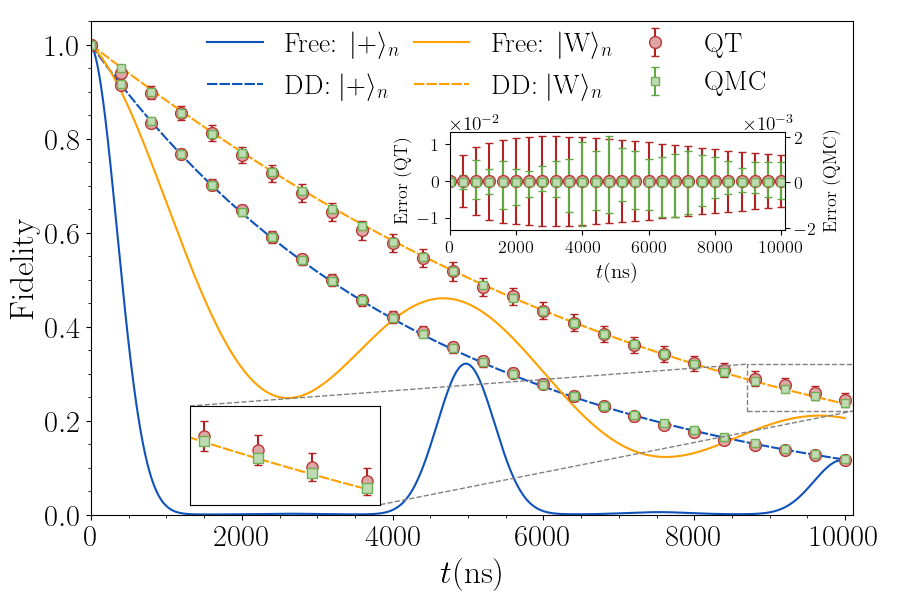

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

plt.subplots_adjust(left=0.106, right=0.942, bottom=0.138, top=0.963)

ax.plot(free_time_list, me_free_plus_state, lw=1.5, color=blue[0], label="Free: " + r"$|+\rangle_n$")
ax.plot(x2_time_list, me_x2_plus_state, lw=1.5, color=blue[0], linestyle=(0,(5,1)) , label="DD: " + r"$|+\rangle_n$")

ax.plot(free_time_list, me_free_w_state, lw=1.5, color=gold[0], label="Free: " + r"$| \mathrm{W} \rangle_n$")
ax.plot(x2_time_list, me_x2_w_state, lw=1.5, color=gold[0], linestyle=(0,(5,1)) , label="DD: " + r"$| \mathrm{W} \rangle_n$")

ax.errorbar(x2_time_list[0:52:2], qt_x2_w_state_mean[0:52:2], yerr=1.96 * qt_x2_w_state_std[0:52:2] / np.sqrt(1200), 
            label='QT',
            fmt='o', markersize=8.5, capsize=3,
            color=qt_red[1], markerfacecolor=qt_red[4], ecolor=qt_red[0]
        )
ax.errorbar(x2_time_list[0:52:2], qt_x2_plus_state_mean[0:52:2], yerr=1.96 * qt_x2_plus_state_std[0:52:2] / np.sqrt(5800), 
            fmt='o', markersize=8.5, capsize=3,
            color=qt_red[1], markerfacecolor=qt_red[4], ecolor=qt_red[0]
        )

# QMC plots
ax.errorbar(x2_time_list[0:52:2], qmc_x2_w_state_mean[0:52:2], yerr=[qmc_x2_w_state_le[0:52:2], qmc_x2_w_state_ue[0:52:2]], 
            label='QMC',
            fmt='s',  markersize=6, capsize=3,
            color=green[1], markerfacecolor=green[4], ecolor=green[0]
        )
ax.errorbar(x2_time_list[0:52:2], qmc_x2_plus_state_mean[0:52:2], yerr=[qmc_x2_plus_state_le[0:52:2], qmc_x2_plus_state_ue[0:52:2]], 
            fmt='s',  markersize=6, capsize=3,
            color=green[1], markerfacecolor=green[4], ecolor=green[0]
        )

# axis
ax.set_xlabel(r'$t (\mathrm{ns})$', fontsize=24)
ax.set_ylabel("Fidelity", fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=22)
ax.set_xlim(0,1.01e4)
ax.set_ylim(0,1.05)
ax.minorticks_on()

# inset plot
def position_inset(base_ax, inset, x, y, width, height):
    def inset_locator(ax, renderer):
        bbox = base_ax.get_position()
        return [bbox.x0 + x*bbox.width, bbox.y0 + y*bbox.height, bbox.width * width, bbox.height * height]
    inset.set_axes_locator(inset_locator)

axins = zoomed_inset_axes(ax, zoom=1, loc='upper right')
axins.set_xticks([])
axins.set_yticks([])
axins.set_xlim(8700, 10100)
axins.set_ylim(0.22, 0.32)
position_inset(ax, axins, 0.13, 0.02, 0.25, 0.20)
axins.plot(x2_time_list, me_x2_w_state, lw=1.5, color=gold[0], linestyle=(0,(5,1)))
axins.errorbar(x2_time_list[0:52:2], qt_x2_w_state_mean[0:52:2], yerr=1.96 * qt_x2_w_state_std[0:52:2] / np.sqrt(1200), 
            fmt='o', markersize=8, capsize=3,
            color=qt_red[1], markerfacecolor=qt_red[4], ecolor=qt_red[0]
        )
axins.errorbar(x2_time_list[0:52:2], qmc_x2_w_state_mean[0:52:2], yerr=[qmc_x2_w_state_le[0:52:2], qmc_x2_w_state_ue[0:52:2]], 
            fmt='s',  markersize=7, capsize=3,
            color=green[1], markerfacecolor=green[4], ecolor=green[0]
        )
mark_inset(ax, axins, loc1=4, loc2=2, fc="none", ec="0.5", linestyle='--')

ax_errorbar_qt = inset_axes(ax, width="80%", height="80%", 
                    bbox_to_anchor=(0.37, 0.54, 0.55, 0.25),
                    bbox_transform=ax.transAxes)
ax_errorbar_qt.errorbar(x2_time_list[0:52:2], np.zeros(26), yerr=1.96 * qt_x2_plus_state_std[0:52:2] / np.sqrt(5800), 
            fmt='o', markersize=8.5, capsize=3,
            color=qt_red[1], markerfacecolor=qt_red[4], ecolor=qt_red[0]
        )
ax_errorbar_qmc = ax_errorbar_qt.twinx()
ax_errorbar_qmc.errorbar(x2_time_list[0:52:2], np.zeros(26), yerr=[qmc_x2_plus_state_le[0:52:2], qmc_x2_plus_state_ue[0:52:2]], 
            fmt='s', markersize=6, capsize=3,
            color=green[1], markerfacecolor=green[4], ecolor=green[0]
        )

ax_errorbar_qt.set_ylabel('Error (QT)', fontsize=13)
ax_errorbar_qt.set_xlabel(r'$t (\mathrm{ns})$', fontsize=15)
ax_errorbar_qmc.set_ylabel('Error (QMC)', fontsize=13)

ax_errorbar_qt.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_errorbar_qt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax_errorbar_qt.yaxis.get_offset_text().set_fontsize(14)
ax_errorbar_qt.tick_params(axis='both', labelsize=13)
ax_errorbar_qmc.yaxis.get_offset_text().set_x(0.88)  # Adjust this value as needed
ax_errorbar_qmc.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax_errorbar_qmc.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax_errorbar_qmc.yaxis.get_offset_text().set_fontsize(14)
ax_errorbar_qmc.tick_params(axis='y', labelsize=13)

ax_errorbar_qt.set_xlim(0,1.01e4)

## legend
ax.legend(
    bbox_to_anchor=(0.52, 0.91), frameon = False, 
    fontsize=20, ncol=3, columnspacing=0.5, loc='center')

plt.tight_layout()
plt.savefig("../fig/crosstalk_benchmark_10qubit.pdf")
plt.savefig("../fig/crosstalk_benchmark_10qubit.svg")

In [6]:
# ghz data
data_qmc_run = np.load("../data/qmc_ghz_state_preparation_10qubit_benchmark.npz")
Nw_diag_re_mean = data_qmc_run['Nw_diag_re_mean']
Nw_diag_im_mean = data_qmc_run['Nw_diag_im_mean']
Nw_diag_im_ub   = data_qmc_run['Nw_diag_im_ub']
Nw_diag_im_lb   = data_qmc_run['Nw_diag_im_lb']
data_walker_number = np.load("../data/qmc_ghz_state_preparation_walker_count_10qubit.npz")

ghz_t_list = np.linspace(0,540,55)

Nw_tot_index = [0,1,6,7,12,13,18,19,24,25,30,31,36,37,42,43,48,49,54] # we just marker significant values
Nw_tot = data_walker_number['Nw_tot']

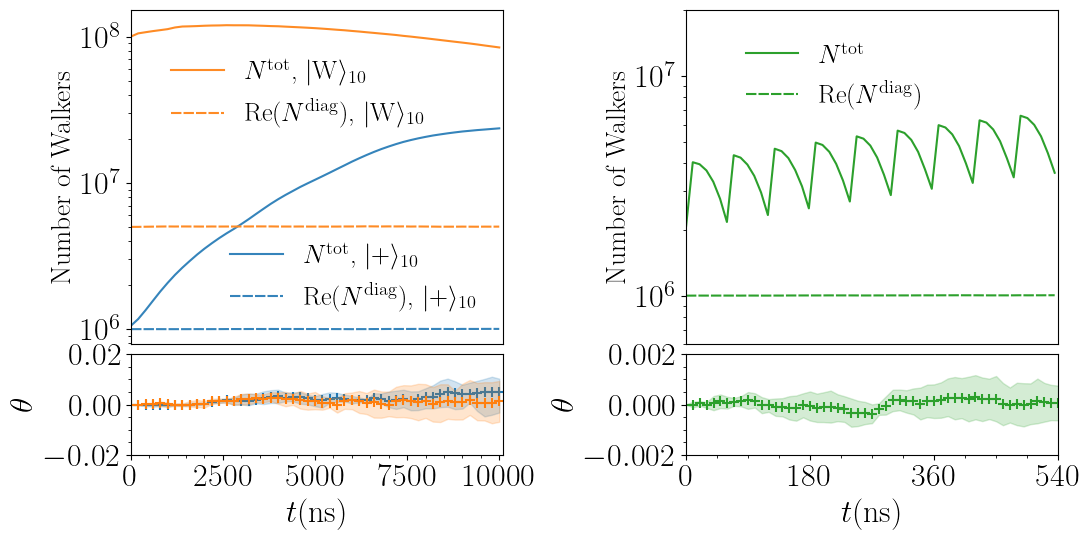

In [7]:
fig, (ax_walker, ax_walker_ghz) = plt.subplots(1, 2, figsize=(11, 5.5))

divider = make_axes_locatable(ax_walker)
ax_sign = divider.append_axes("bottom", size="30%", pad=0.1)
ax_walker.set_ylabel('Number of Walkers', fontsize=20)
ax_walker.set_xlim(0,1.01e4)
ax_walker.set_xticklabels([])
ax_walker.xaxis.set_visible(False)
ax_walker.tick_params(axis='y', which='major', labelsize=23)
ax_walker.set_yscale('log')
ax_walker.minorticks_on()
ax_sign.set_ylabel(r'$\theta$', fontsize=23)
ax_sign.set_ylim(-0.02, 0.02)
ax_sign.tick_params(axis='both', which='major', labelsize=23)
ax_sign.set_xlabel(r'$t (\mathrm{ns})$', fontsize=23)
ax_sign.set_xlim(0,1.01e4)
ax_sign.set_xticks([0, 2500, 5000, 7500, 10000])
ax_sign.minorticks_on()

plt_1, = ax_walker.plot(t_qmc_x2, Nw_tot_plus_state, label=r'$N^{\mathrm{tot}}$'+', '+r"$|+\rangle_{10}$",
               color=c0_blue[1]
            )
plt_2, = ax_walker.plot(t_qmc_x2, Nw_diag_re_mean_plus_state, label=r'$\mathrm{Re}(N^{\mathrm{diag}})$'+', '+r"$|+\rangle_{10}$",
               color=c0_blue[1], linestyle=(0,(5,1))
            )
plt_3, = ax_walker.plot(t_qmc_x2, Nw_tot_w_state, label=r'$N^{\mathrm{tot}}$'+', '+r"$|\mathrm{W}\rangle_{10}$",
               color=c1_orange[1]
            )
plt_4, = ax_walker.plot(t_qmc_x2, Nw_diag_re_mean_w_state, label=r'$\mathrm{Re}(N^{\mathrm{diag}})$'+', '+r"$|\mathrm{W}\rangle_{10}$",
                color=c1_orange[1], linestyle=(0,(5,1))
            )

ax_sign.scatter(t_qmc_x2, np.arctan(Nw_diag_im_mean_plus_state / Nw_diag_re_mean_plus_state), color='C0', marker='+', s=60)
ax_sign.fill_between(
    t_qmc_x2, np.arctan(Nw_diag_im_lb_plus_state / Nw_diag_re_mean_plus_state), np.arctan(Nw_diag_im_ub_plus_state / Nw_diag_re_mean_plus_state),
    alpha=0.2, color='C0'
)
ax_sign.scatter(t_qmc_x2, np.arctan(Nw_diag_im_mean_w_state / Nw_diag_re_mean_w_state), color='C1', marker='+', s=60)
ax_sign.fill_between(
    t_qmc_x2, np.arctan(Nw_diag_im_lb_w_state / Nw_diag_re_mean_w_state), np.arctan(Nw_diag_im_ub_w_state / Nw_diag_re_mean_w_state),
    alpha=0.2, color='C1'
)

divider_ghz = make_axes_locatable(ax_walker_ghz)
ax_sign_ghz = divider_ghz.append_axes("bottom", size="30%", pad=0.1)
ax_walker_ghz.set_ylabel('Number of Walkers', fontsize=20)
ax_walker_ghz.set_xlim(0,1.01e4)
ax_walker_ghz.set_xticklabels([])
ax_walker_ghz.xaxis.set_visible(False)
ax_walker_ghz.tick_params(axis='y', which='major', labelsize=23)
ax_walker_ghz.set_yscale('log')
ax_walker_ghz.minorticks_on()
ax_walker_ghz.set_ylim(6e5,2e7)
ax_walker_ghz.set_xlim(0,545)
ax_walker_ghz.set_xticks(range(0, 545, 60))

ax_sign_ghz.set_ylabel(r'$\theta$', fontsize=23)
ax_sign_ghz.set_ylim(-0.02, 0.02)
ax_sign_ghz.tick_params(axis='both', which='major', labelsize=23)
ax_sign_ghz.set_xlabel(r'$t (\mathrm{ns})$', fontsize=23)
ax_sign_ghz.minorticks_on()

ax_walker_ghz.plot(ghz_t_list, Nw_tot, label=r'$N^{\mathrm{tot}}$',
               color='C2'
            )
ax_walker_ghz.plot(ghz_t_list, Nw_diag_re_mean, label=r'$\mathrm{Re}(N^{\mathrm{diag}})$',
               color='C2', linestyle=(0,(5,1))
            )

ax_sign_ghz.scatter(ghz_t_list, np.arctan(Nw_diag_im_mean / Nw_diag_re_mean), color='C2', marker='+', s=50)
ax_sign_ghz.fill_between(
    ghz_t_list, np.arctan(Nw_diag_im_lb / Nw_diag_re_mean), np.arctan(Nw_diag_im_ub / Nw_diag_re_mean),
    alpha=0.2, color='C2'
)

ax_sign_ghz.set_xlim(0, 540)
ax_sign_ghz.set_ylim(-0.002, 0.002)
ax_sign_ghz.set_xticks(range(0, 545, 180))

legend_1 = ax_walker.legend(handles=[plt_1, plt_2], bbox_to_anchor=(0.60, 0.20), frameon = False, fontsize=19, loc='center')
ax_walker.add_artist(legend_1)
legend_2 = ax_walker.legend(handles=[plt_3, plt_4], bbox_to_anchor=(0.45, 0.75), frameon = False, fontsize=19, loc='center')
ax_walker_ghz.legend(frameon = False, bbox_to_anchor=(0.40, 0.80), fontsize=19, loc='center')

plt.tight_layout()
plt.savefig("../fig/walker_dynamics.pdf")
plt.savefig("../fig/walker_dynamics.svg")

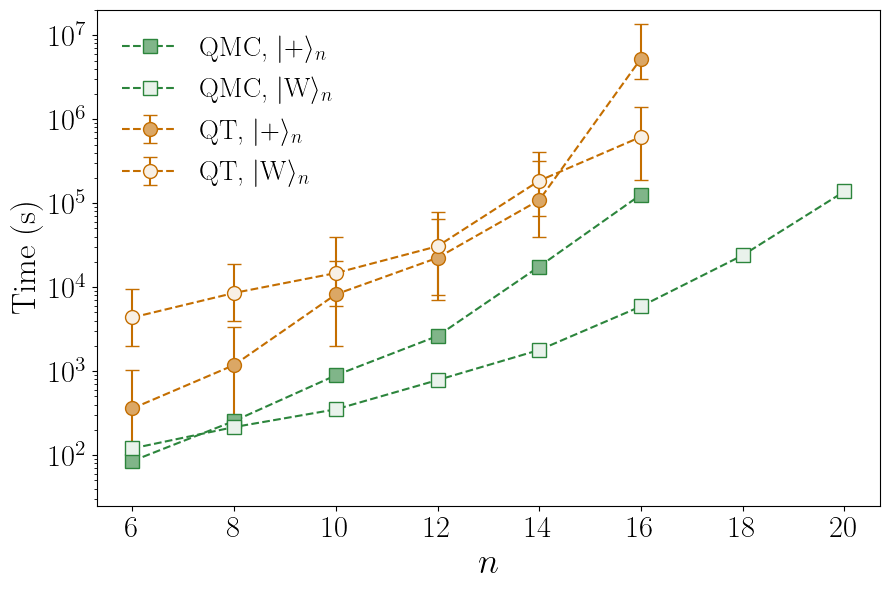

In [8]:
fig, ax_scaling = plt.subplots(figsize=(9, 6))

plt.subplots_adjust(left=0.106, right=0.942, bottom=0.138, top=0.963)

ax_scaling.set_ylabel('Time (s)', fontsize=24)
ax_scaling.set_yscale('log')
ax_scaling.set_xlabel(r'$n$', fontsize=26)
ax_scaling.tick_params(axis='both', which='major', labelsize=22)

ax_scaling.errorbar(n_qubit_plus_state_qt, qt_time_plus_state_mean, yerr=[qt_time_plus_state_lb, qt_time_plus_state_ub],
                linestyle='--', marker='o', markersize=10, capsize=5,
                markerfacecolor=darkorange[3], color=darkorange[0], label='QT'+', '+r"$| + \rangle_n$")
ax_scaling.errorbar(n_qubit_w_state_qt, qt_time_w_state_mean, yerr=[qt_time_w_state_lb, qt_time_w_state_ub],
                linestyle='--', marker='o', markersize=10, capsize=5,
                markerfacecolor=darkorange[6], color=darkorange[0], label='QT'+', '+r"$| \mathrm{W} \rangle_n$")
ax_scaling.plot(nqubit_plus_state, qmc_time_plus_state, 
                linestyle='--', marker='s', markersize=10,
                markerfacecolor=darkgreen[3], color=darkgreen[0], label='QMC'+', '+r"$| + \rangle_n$")
ax_scaling.plot(nqubit_w_state, qmc_time_w_state, 
                linestyle='--', marker='s', markersize=10,
                markerfacecolor=darkgreen[6], color=darkgreen[0], label='QMC'+', '+r"$| \mathrm{W} \rangle_n$")
ax_scaling.legend(frameon = False, fontsize=20)

ax_scaling.set_ylim(25, 2e7)

plt.tight_layout()
plt.savefig("../fig/crosstalk_scaling.pdf")
plt.savefig("../fig/crosstalk_scaling.svg")